In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("C:/Users/neeraj/Desktop/EW-MAX.csv")


In [6]:
df.head()


,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [7]:
df.tail()


,Date,Open,High,Low,Close,Adj_Close,Volume
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600
4391,2017/9/8,112.300003,114.790001,112.010002,113.190002,113.190002,1611700


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [9]:
pd.isnull(df).sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [10]:
sorted_df = df.sort_values('Volume', ascending = True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
1425,2005/11/25,10.275000,10.352500,10.260000,10.325000,10.325000,190400
104,2000/8/23,5.718750,5.734375,5.640625,5.718750,5.718750,220000
93,2000/8/8,5.671875,5.687500,5.500000,5.625000,5.625000,224000
923,2003/11/28,7.500000,7.582500,7.477500,7.530000,7.530000,224800
1926,2007/11/23,12.282500,12.462500,12.257500,12.422500,12.422500,225600
320,2001/7/3,6.587500,6.637500,6.562500,6.562500,6.562500,226000
322,2001/7/6,6.535000,6.535000,6.370000,6.370000,6.370000,246400
150,2000/10/27,5.828125,5.875000,5.750000,5.750000,5.750000,262000
942,2003/12/26,7.450000,7.500000,7.425000,7.472500,7.472500,263600
116,2000/9/11,5.593750,5.593750,5.531250,5.578125,5.578125,264400


In [11]:
sorted_df = df.sort_values('High', ascending = True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
153,2000/11/1,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
154,2000/11/2,3.296875,3.562500,3.265625,3.546875,3.546875,3819600
7,2000/4/5,3.468750,3.562500,3.453125,3.484375,3.484375,6349600
166,2000/11/20,3.578125,3.578125,3.390625,3.437500,3.437500,530800
6,2000/4/4,3.531250,3.578125,3.093750,3.500000,3.500000,13136800
8,2000/4/6,3.500000,3.593750,3.468750,3.578125,3.578125,7181200
165,2000/11/17,3.609375,3.609375,3.390625,3.546875,3.546875,1190000
15,2000/4/17,3.578125,3.609375,3.515625,3.562500,3.562500,2992000
16,2000/4/18,3.609375,3.625000,3.484375,3.515625,3.515625,2896000
14,2000/4/14,3.609375,3.625000,3.531250,3.609375,3.609375,2626000


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4392.0,3.056254e+01,2.991476e+01,3.296875,8.718125e+00,1.476625e+01,4.254625e+01,1.210800e+02
High,4392.0,3.089362e+01,3.021097e+01,3.390625,8.803125e+00,1.498125e+01,4.305125e+01,1.217500e+02
Low,4392.0,3.023883e+01,2.961576e+01,3.000000,8.625000e+00,1.466250e+01,4.208625e+01,1.201700e+02
Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Adj_Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Volume,4392.0,1.884027e+06,1.621609e+06,190400.000000,1.088800e+06,1.539300e+06,2.188900e+06,4.641260e+07


In [13]:
most_volume = df.query('Volume>1500000', inplace = False).sort_values('Volume', ascending = False)
most_volume[:10]

,Date,Open,High,Low,Close,Adj_Close,Volume
2770,2011/3/31,44.005001,44.095001,43.360001,43.500000,43.500000,46412600
2103,2008/8/7,14.082500,14.547500,13.437500,14.460000,14.460000,23767600
3288,2013/4/24,33.275002,33.299999,31.750000,32.299999,32.299999,22986800
153,2000/11/1,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
152,2000/10/31,3.812500,4.000000,3.343750,3.359375,3.359375,17944400
3155,2012/10/9,44.779999,44.794998,42.285000,42.299999,42.299999,17734800
833,2003/7/23,8.000000,8.000000,6.675000,6.875000,6.875000,16833200
4173,2016/10/26,99.300003,100.860001,94.250000,94.250000,94.250000,16796600
3533,2014/4/14,40.965000,42.200001,40.365002,40.500000,40.500000,14450200
9,2000/4/7,3.593750,3.812500,3.593750,3.609375,3.609375,13904800


In [14]:
df[["High"]].iloc[18]

High    3.6875
Name: 18, dtype: float64

In [15]:
df[["Low"]].iloc[10]

Low    3.625
Name: 10, dtype: float64

<Axes: ylabel='count'>

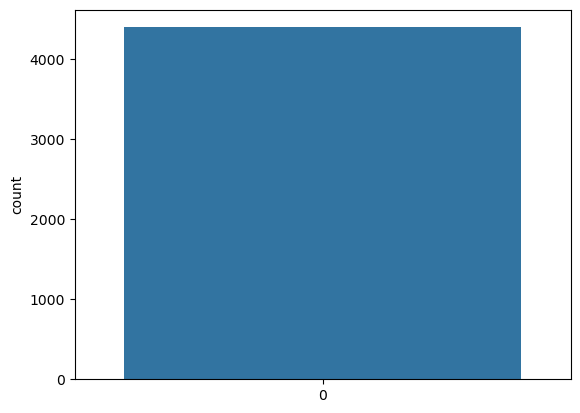

In [16]:
sns.countplot(df.Volume)


C:\Users\neeraj\AppData\Local\Temp\ipykernel_10868\3489652106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.High)


<Axes: xlabel='High', ylabel='Density'>

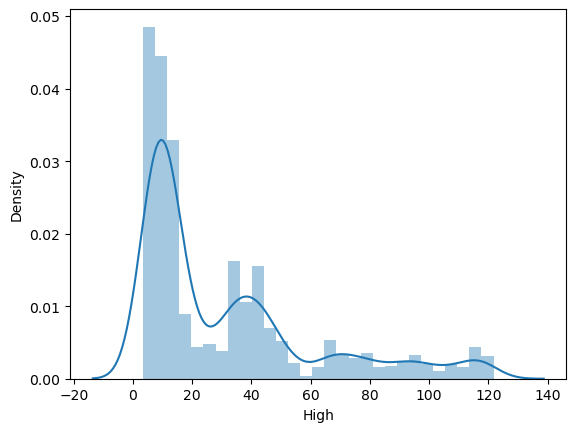

In [17]:
sns.distplot(df.High)

<Axes: >

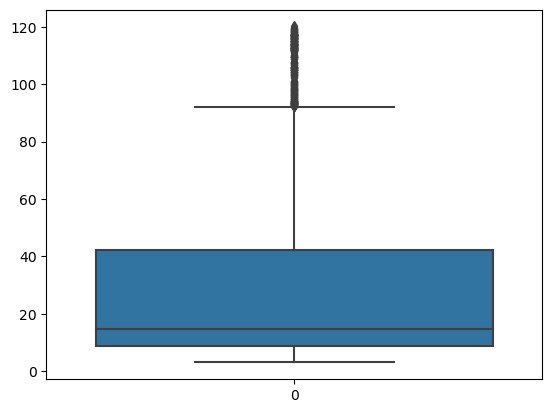

In [18]:
sns.boxplot(df.Low)


<Axes: >

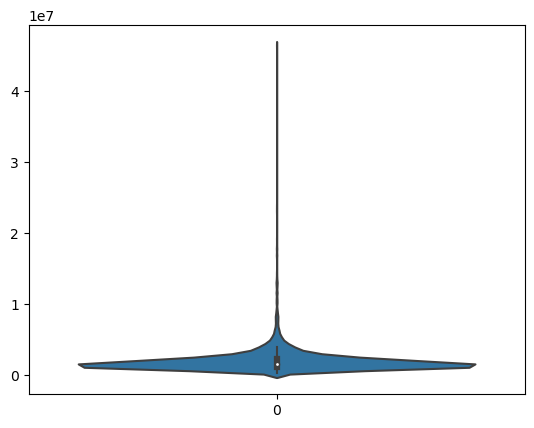

In [19]:
sns.violinplot(df.Volume)


C:\Users\neeraj\AppData\Local\Temp\ipykernel_10868\3208658287.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

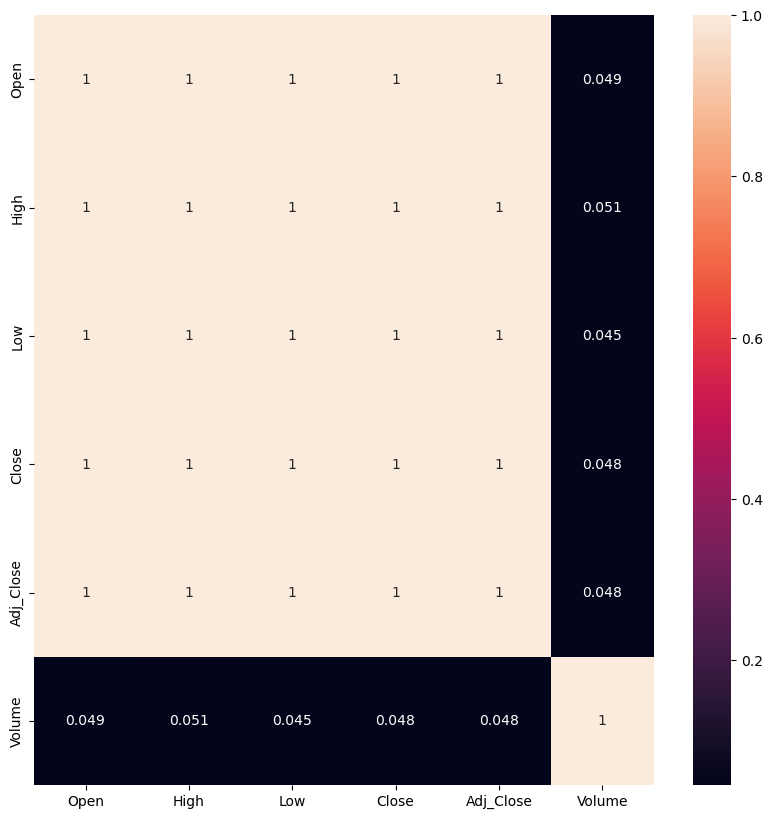

In [20]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), annot=True)


[Text(0.5, 1.0, 'High vs Volume')]

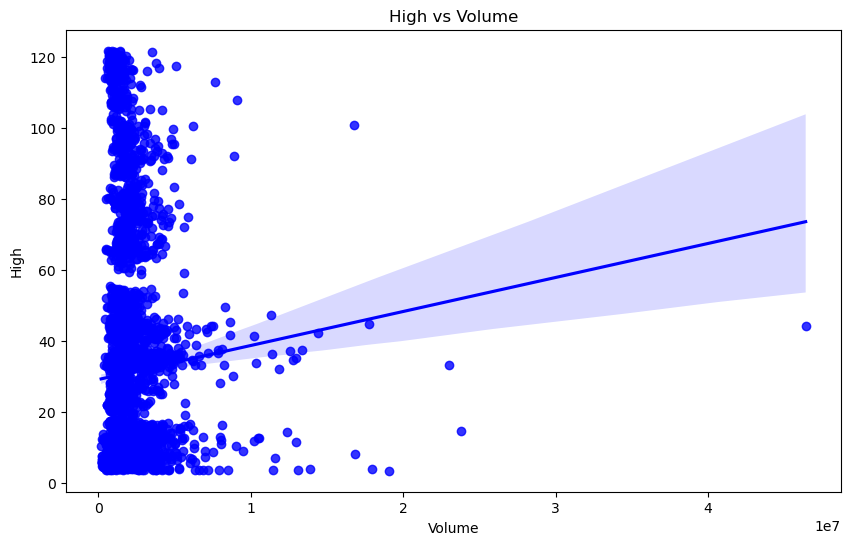

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data = df, y = "High", x ="Volume", color = "b").set(title = "High vs Volume")
